In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
%matplotlib inline

# Pre-Processing

## Load Cifar Database

https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

There are 50000 training images and 10000 test images.

32 x 32 = 1024 x 3 = 3072

3072 input pixels

### Class Names

In [2]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

### Normalize Images

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train = x_train / 255.0  # Values Between 0 and 1
x_test = x_test / 255.0

In [6]:
x_train.shape

(50000, 32, 32, 3)

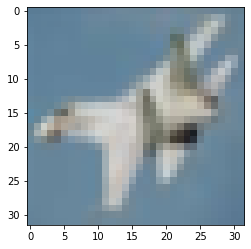

In [7]:
plt.imshow(x_test[10])

# Building Convolutional Neural Network

![](https://discuss.pytorch.org/uploads/default/original/3X/2/0/203b91f1109ebb8d98c9fa715e979336ee26821f.jpeg)

In [8]:
model = Sequential()

## Add First Layer

### filters = 32

![filters](https://indoml.files.wordpress.com/2018/03/convolution-with-multiple-filters2.png)

### kernel_size = 3 

### Filter Matriz 3x3

$$\begin{bmatrix} 0 & 0 & 0 \\ 1 & 1 & 1 \\ -1 & -1 & -1 \end{bmatrix}$$



## Padding = same

![padding](http://media5.datahacker.rs/2018/11/sl_1.png)

### activation function = relu

![relu](https://miro.medium.com/max/700/1*DfMRHwxY1gyyDmrIAd-gjQ.png)

### input_shape = (32,32,3) Width x Height x Filters

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[32,32,3]))

## Add Second Layer


### Convolution

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))

Max Pooling

In [11]:
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid',))

## Add Third Layer

filters = 64

kernel_size = 3

padding = same

activation = relu

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

## Add Fourth Layer

filters = 64

kernel_size = 3

padding = same

activation = relu

In [13]:
  model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))

Max Pooling:

pool_size=2

strides=2

padding='valid

In [14]:
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

## Add Flattening Layer

In [15]:
model.add(Flatten())

# Dense Neural Network (Fully Connected)

## First Dense Layer

unit/neurons = 128

activation function = relu

In [16]:
model.add(Dense(units=128,activation='relu'))

## Output Dense Layer

unit/neurons = 10 ---> 10 Classes

activation function = softmax 

Softmax = Classification with more than 2 classes



In [17]:
model.add(Dense(units=10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

591,274 Weights

## Model Compile

In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['sparse_categorical_crossentropy'])  

## Model Train

In [20]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 8s 4ms/step - loss: 1.6304 - sparse_categorical_crossentropy: 1.6304
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9473 - sparse_categorical_crossentropy: 0.9473
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7231 - sparse_categorical_crossentropy: 0.7231
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5813 - sparse_categorical_crossentropy: 0.5813
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4621 - sparse_categorical_crossentropy: 0.4621


## Evaluate

In [21]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8453 - sparse_categorical_crossentropy: 0.8453


In [22]:
test_loss

0.8452528119087219

In [23]:
model.save_weights("model.h5")
model.save("model_complete.h5")
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print("Saved model to disk")

Saved model to disk


# Predict

## Download cifar images to png

In [24]:
from PIL import Image

In [25]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
for i in range(11):
        im = Image.fromarray(X_test[i])
        im.save("{}.png".format(i))


In [26]:
#loading the saved model 
from keras.models import load_model 
model = load_model('/content/model_complete.h5')

In [33]:
import numpy as np 
from keras.preprocessing import image
# Give the link of the image here to test 
test_image1 =image.load_img('/content/6.png',target_size =(32,32))

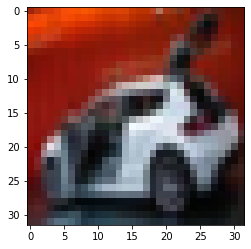

In [34]:
plt.imshow(test_image1)

In [35]:
test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = model.predict(test_image) 
print(result)
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

[[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.0664485e-21]]
Automobile
